## SEABORN
It is built on top of matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option("display.max_columns",2000)

In [2]:
df = pd.read_csv("dm_office_sales.csv")
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


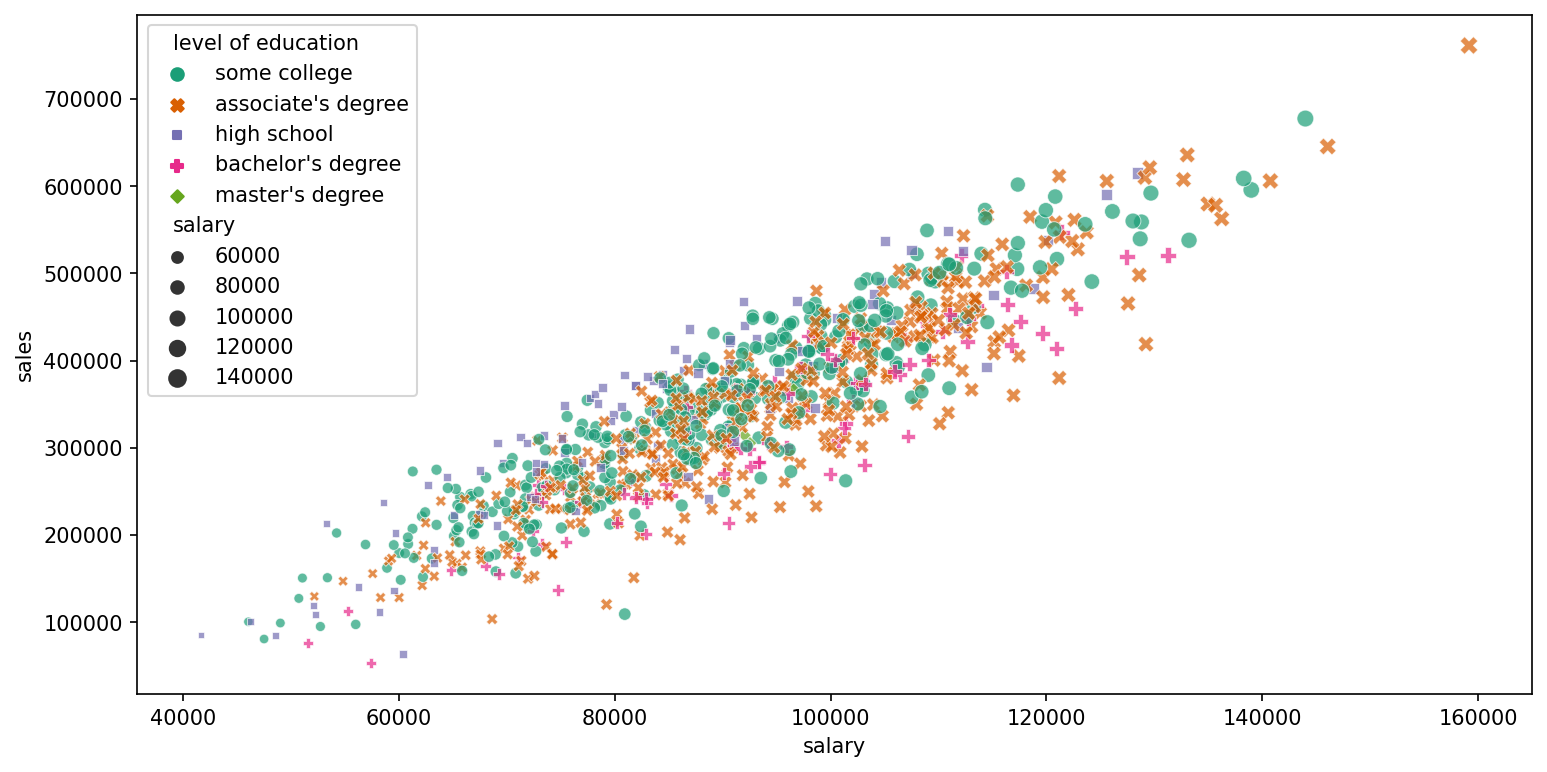

In [3]:
plt.figure(figsize=(12,6),dpi=150)
sns.scatterplot(data=df,x='salary',y='sales',hue='level of education',palette='Dark2',size='salary',alpha=0.7,style='level of education')
# plt.savefig('my_plot.png')
plt.show()
# the hue is used to color differentiate the plot
# ? https://matplotlib.org/stable/tutorials/colors/colormaps.html palette is the sequence color ref documentation here it is "qualitative colormaps"
# size for continuous column which gets bigger for greater values and smaller for small values
# s=200 is used to increase size of view  of dots
# alpha is used to adjust the transperancy of view ranges b/w 0 to 1 where 0 is no view and 1 is default
# style is categorical field changes shapes in dots

## DISTRIBUTION PLOTS

<AxesSubplot:xlabel='salary'>

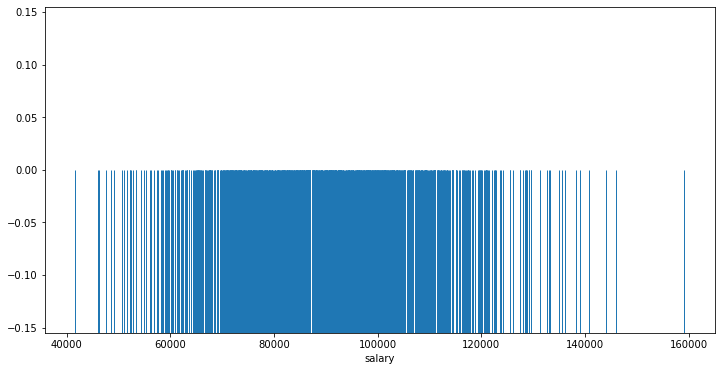

In [4]:
plt.figure(figsize=(12,6))
sns.rugplot(df['salary'],height=0.5)

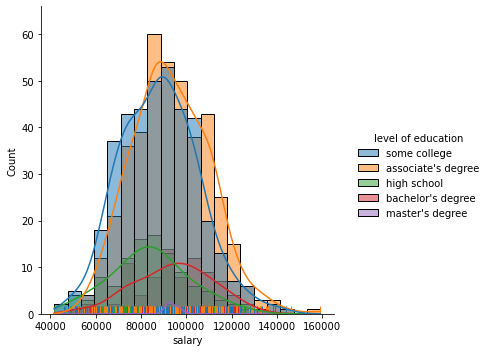

In [5]:
# sns.set is highlevel command that will set to all the graph once executed even commented and execute the code will not replace it
# to undo it reset the kernal and run all cells
# sns.set(style='whitegrid')  # style='whitegrid,darkgrid,white,dark,ticks'
sns.displot(data=df,x='salary',hue='level of education',bins=20,kde=True,rug=True)
# bins is number of reference rule

<AxesSubplot:xlabel='salary', ylabel='Count'>

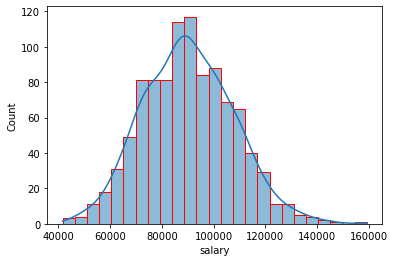

In [6]:
sns.histplot(data=df,x='salary',kde=True,edgecolor='red')

<AxesSubplot:xlabel='salary', ylabel='Density'>

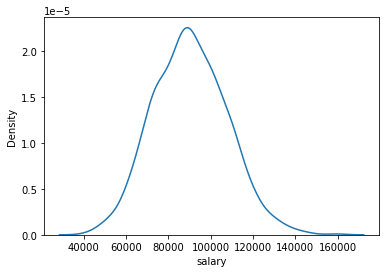

In [7]:
sns.kdeplot(data=df,x='salary')

In [8]:
np.random.seed(42)
sample_ages = np.random.randint(0,100,200)

In [9]:
sample_ages = pd.DataFrame(sample_ages,columns=['age'])

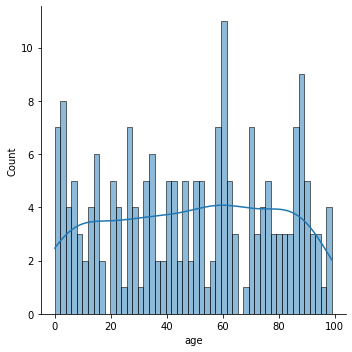

In [10]:
sns.displot(data=sample_ages,x='age',bins=50,kde=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

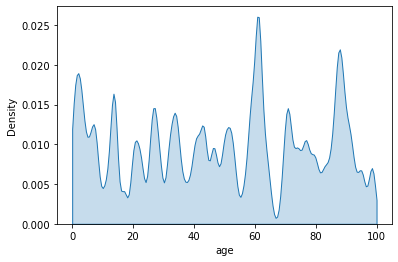

In [11]:
sns.kdeplot(data=sample_ages,x='age',clip=[0,100],bw_adjust=0.1,shade=True)
# the clip is used to cut the graph

## CATEGORICAL PLOTS

In [12]:
df['division'].value_counts()

office supplies      252
printers             250
peripherals          243
computer hardware    159
computer software     96
Name: division, dtype: int64

<AxesSubplot:xlabel='division', ylabel='count'>

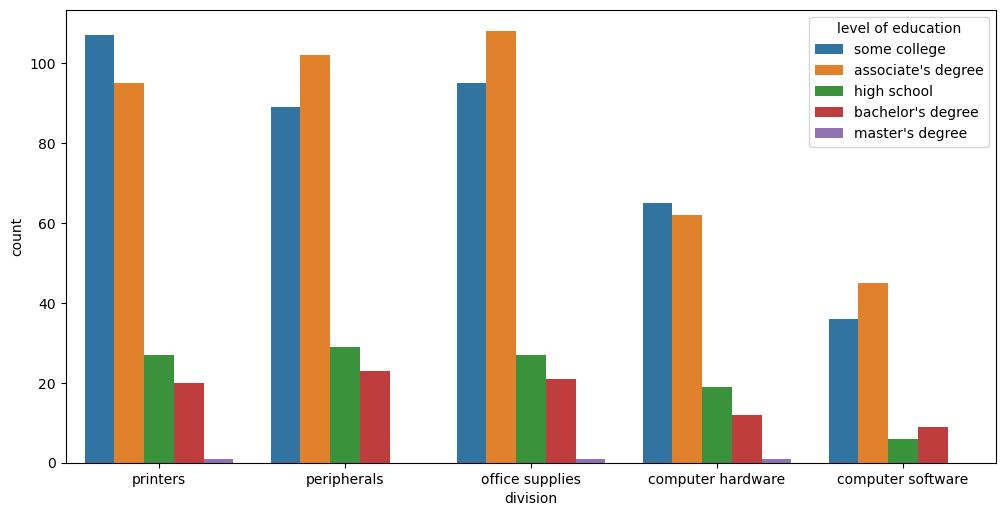

In [13]:
plt.figure(figsize=(12,6),dpi=100)
sns.countplot(data=df,x='division',hue='level of education')
# the 'y' axis is always the count of the values of the 'x' axis

In [14]:
sorted(df['level of education'].unique())

["associate's degree",
 "bachelor's degree",
 'high school',
 "master's degree",
 'some college']

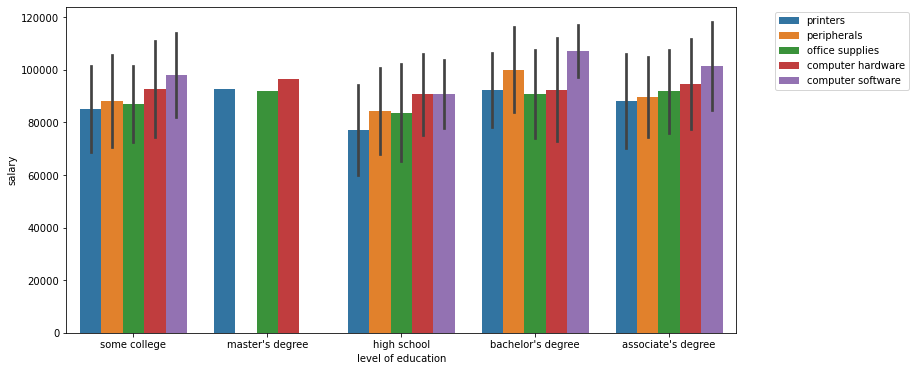

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='level of education',y='salary',estimator=np.median,ci='sd',order=sorted(df['level of education'].unique(),reverse=True),hue='division')
plt.legend(bbox_to_anchor=(1.05,1))
# the default value of estimator is mean
# ci is confidence interval

## DISTRIBUTION WITHIN CAREGORIES

!['boxplot'](https://miro.medium.com/max/700/1*2c21SkzJMf3frPXPAR_gZA.png)

- **median** (Q2/50th Percentile): the middle value of the dataset.
- **first quartile** (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
- **third quartile** (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
- **interquartile** range (IQR): 25th to the 75th percentile.
- **whiskers** (shown in blue)
- **outliers** (shown as green circles)
- **“maximum”**: Q3 + 1.5*IQR
- **“minimum”**: Q1 -1.5*IQR



In [16]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


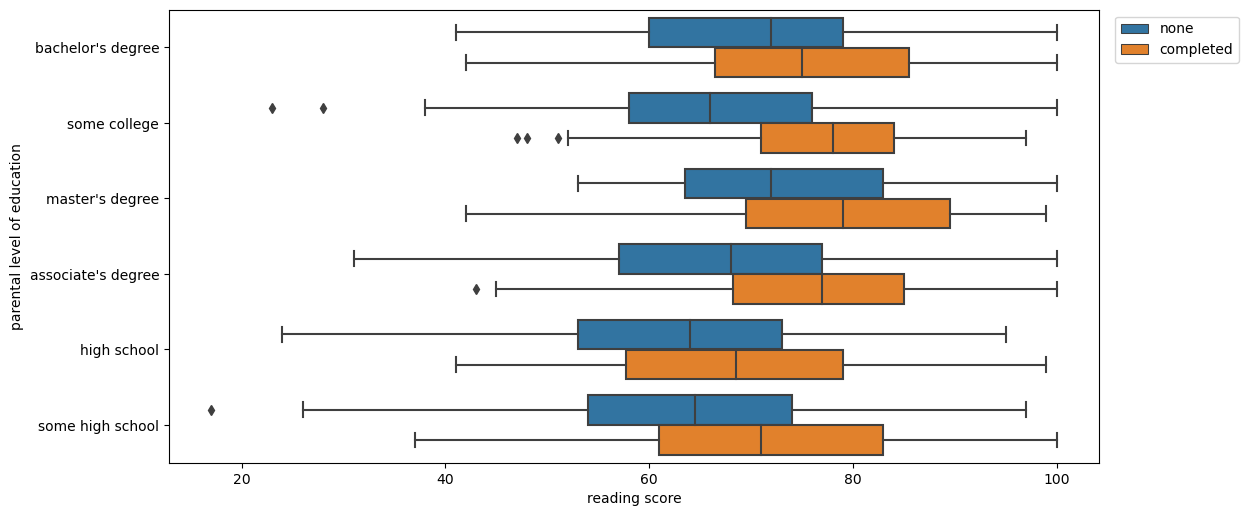

In [17]:
plt.figure(figsize=(12,6),dpi=100)
sns.boxplot(data=df, x='reading score',
            y='parental level of education', hue='test preparation course')
plt.legend(bbox_to_anchor=(1.01,1))


<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

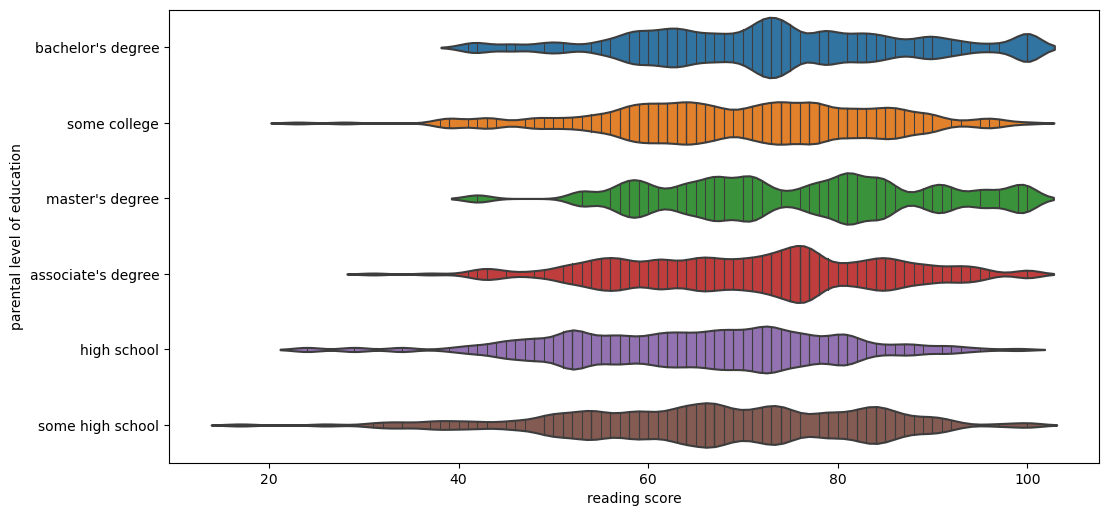

In [18]:
# the violin plot is kde of boxplot along with mirror of the kde
plt.figure(figsize=(12, 6), dpi=100)
sns.violinplot(data=df, x='reading score',
               y='parental level of education',inner='stick',bw=0.1)
# plt.legend(bbox_to_anchor=(1.2,1))
# split=True will split based oh hue
# inner=None removes the inside boxplot; inner='quartile' draws lines of the boxplot values; inner='stick' draws lines for every values

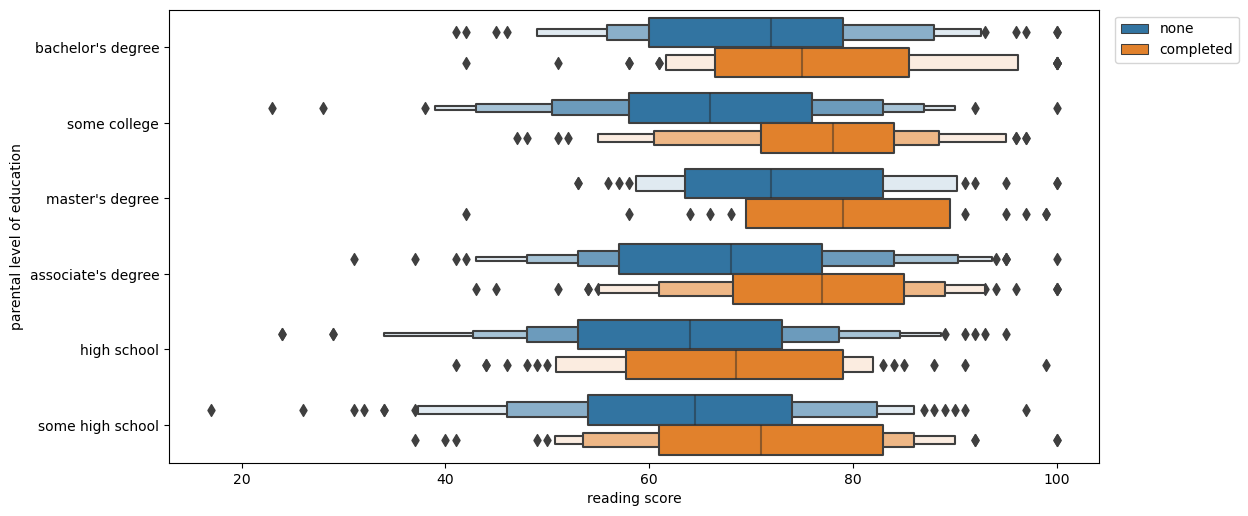

In [19]:
plt.figure(figsize=(12, 6), dpi=100)
sns.boxenplot(data=df, x='reading score',
            y='parental level of education', hue='test preparation course')
plt.legend(bbox_to_anchor=(1.01, 1))


<AxesSubplot:xlabel='math score', ylabel='gender'>

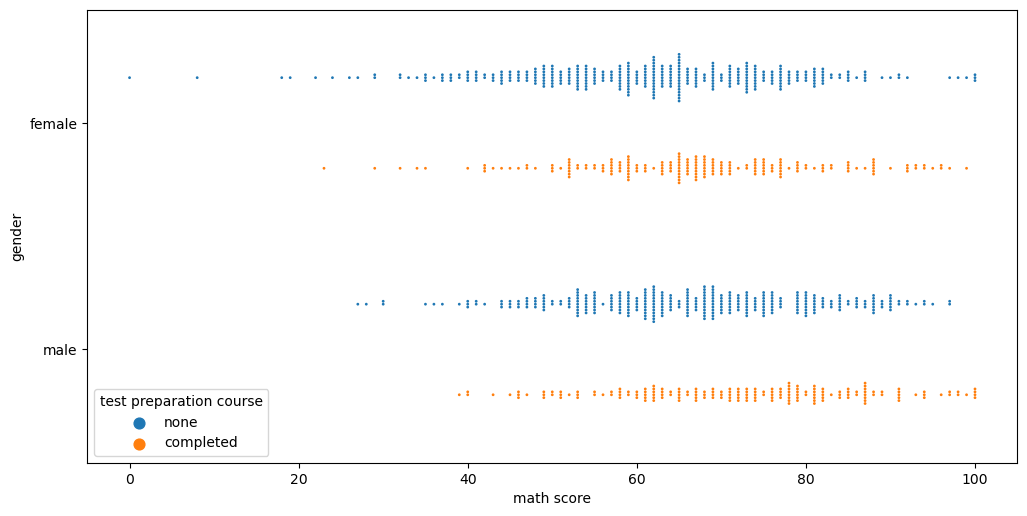

In [20]:
plt.figure(figsize=(12,6),dpi=100)
sns.swarmplot(data=df,x='math score',size=2,y='gender',hue='test preparation course',dodge=True)
# size 

## COMPARISION PLOTS

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


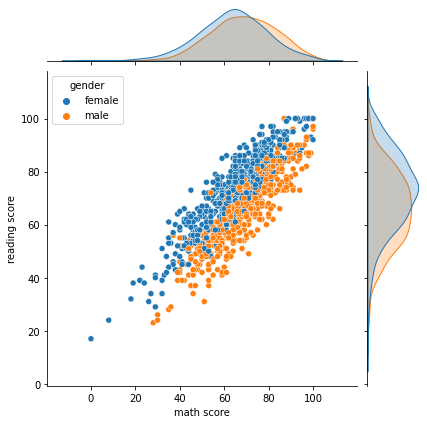

In [22]:
sns.jointplot(data=df,x='math score',y='reading score',kind='scatter',hue='gender')
# kind='scatter' alpha=0.2 to get scatter plot with lightness
# use of hue gives kde on outside
# kind='hist' to get square blocks and well aligned with the bins 
# kind='kde' shade=True will get shaded kde

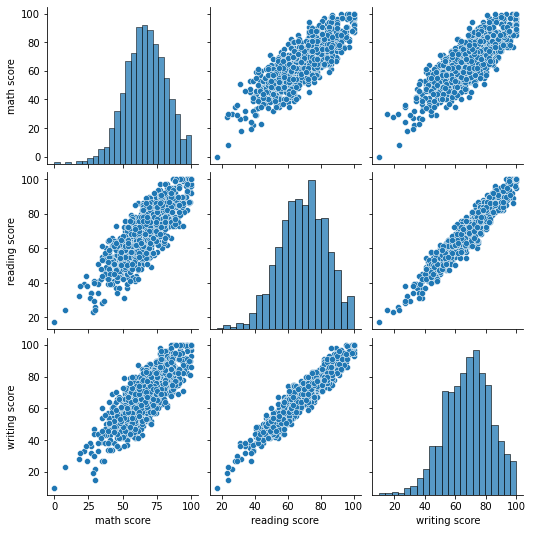

In [23]:
# pairplot is CPU intensive so always optime the dataframe in order to use the pairplot
# and also reduce the columns for optimization
sns.pairplot(data=df)

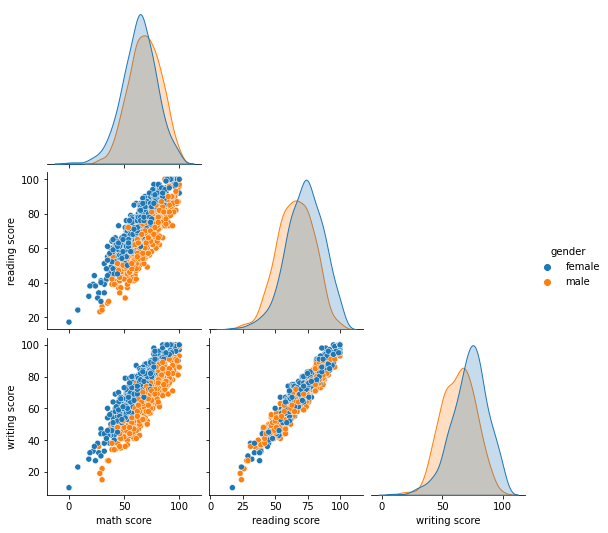

In [24]:
sns.pairplot(data=df,hue='gender',corner=True)
# cornor=True removes the duplicates
# diag_kind='hist' show the histogram plot in the diagonal which is used when we need histogram plot if we used hue parameter the default graph shown in kde

## GRIDPLOTS

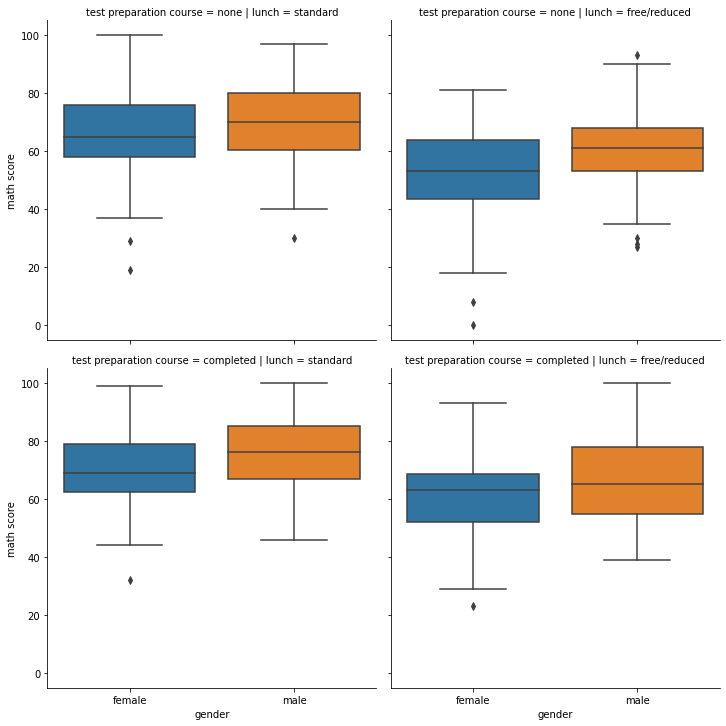

In [25]:
sns.catplot(data=df,x='gender',y='math score',kind='box',col='lunch',row='test preparation course')
# for row and column plots
# catplot run on FacetGrid which is likely as PairGrid

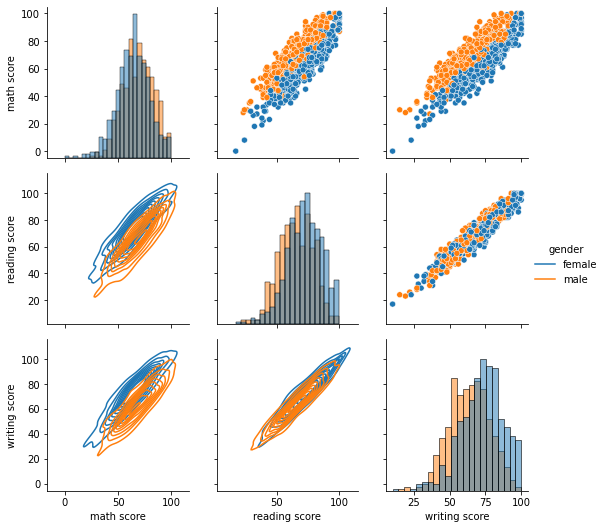

In [26]:
g = sns.PairGrid(df,hue='gender')

g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.histplot)
g = g.add_legend()

## MATRIX PLOT

In [27]:
df = pd.read_csv('country_table.csv',index_col='Countries')
df

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.40
ASIA,15.796,7.030,73.787,23.185,8.44
EUROPE,10.118,11.163,78.740,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
OCEANIA,16.235,6.788,78.880,16.939,12.79
WORLD,17.963,7.601,72.766,27.492,10.36


<AxesSubplot:ylabel='Countries'>

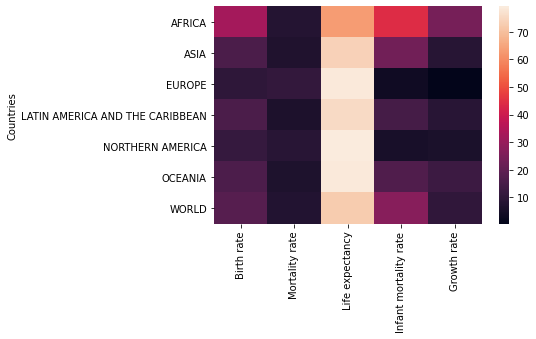

In [28]:
sns.heatmap(df)

<AxesSubplot:ylabel='Countries'>

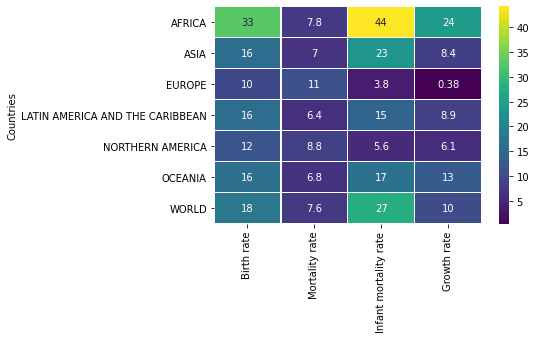

In [29]:
sns.heatmap(df.drop('Life expectancy',axis=1),lw=0.2,annot=True,cmap='viridis')
# annot=True to show values in plot
# cmap='viridis' same as palette


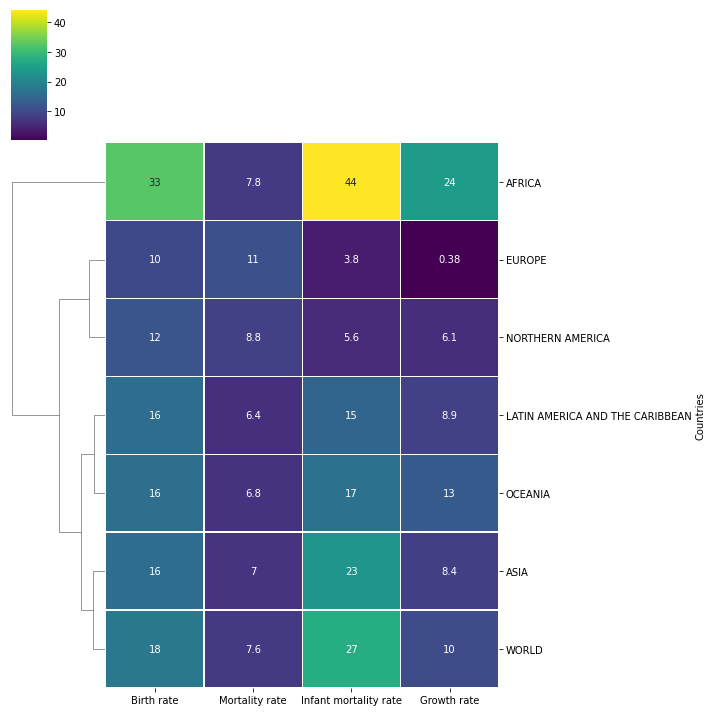

In [30]:
sns.clustermap(df.drop('Life expectancy',axis=1),lw=0.2,cmap='viridis',annot=True,col_cluster=False)